## Revealing the hidden figure

In this experiment a model to reveal the hidden figure is create using the former model trained to identify the disparity.

In [1]:
import sys
sys.path.append("../src")

import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

import keras
from models import create_revealing_model, classifly_with_stereoconv_layer
from generators import CommonImagesGenerator
from livelossplot import PlotLossesKerasTF
from utils import show_sampledata, show_features, get_sample_feature_maps_importance
from matplotlib import pyplot as plt
import seaborn as sns
from keras.models import Model
import numpy as np
import pandas as pd
from layers import StereoConv
from utils import show_images

Using TensorFlow backend.


In [2]:
# read the former trained model
class_model = keras.models.load_model('../checkpoints/stero_class.h5', 
                                      custom_objects={'StereoConv': StereoConv})


In [3]:
revealing_model = create_revealing_model(class_model, compiled=False)
revealing_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
stereo_conv_input (InputLayer)  [(None, 1, 100, 200) 0                                            
__________________________________________________________________________________________________
stereo_conv (StereoConv)        (None, 200, 100, 200 2           stereo_conv_input[0][0]          
                                                                 stereo_conv_input[0][0]          
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 200, 100, 200 800         stereo_conv[0][0]                
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 198, 98, 32)  57632       batch_normalization[0][0]    

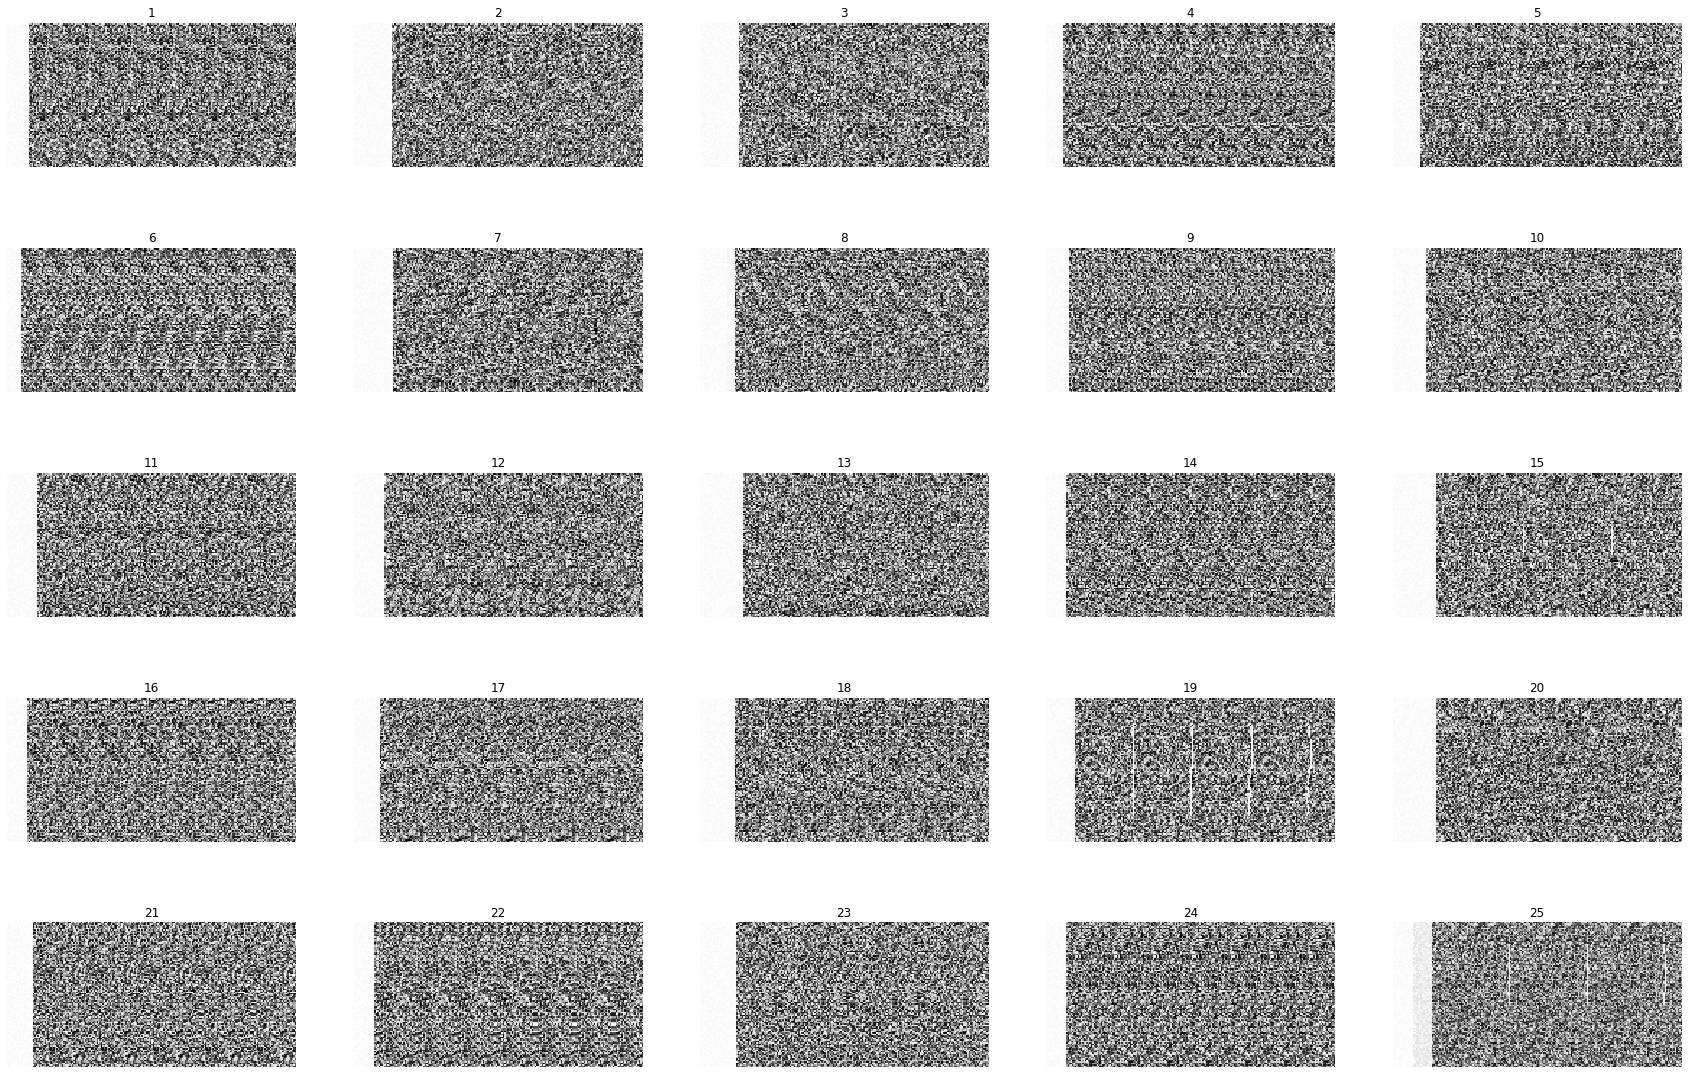

In [4]:
gen = CommonImagesGenerator('../data/fake_heatmaps/', batch_size=25)
batch = gen.__getitem__(0)
figures = revealing_model.predict(batch)
show_images(figures)

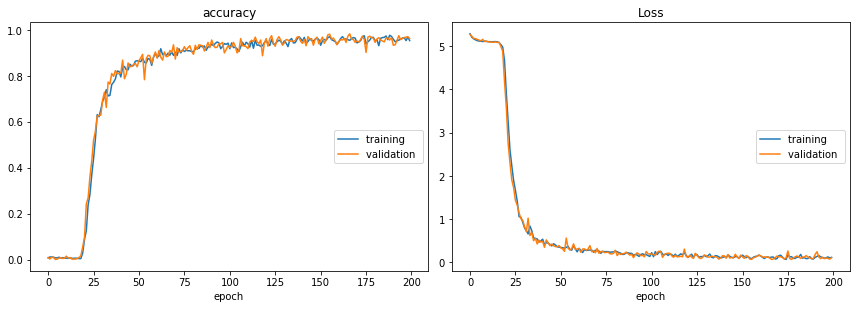

accuracy
	training         	 (min:    0.004, max:    0.977, cur:    0.954)
	validation       	 (min:    0.000, max:    0.983, cur:    0.962)
Loss
	training         	 (min:    0.070, max:    5.293, cur:    0.115)
	validation       	 (min:    0.067, max:    5.271, cur:    0.110)
31/31 [==============================] - 43s 1s/step - loss: 0.1155 - accuracy: 0.9536 - val_loss: 0.1101 - val_accuracy: 0.9625


In [4]:
model, train_gen, val_gen = classifly_with_stereoconv_layer(train_custom_layer=False)
model.layers[0].set_weights(np.array([[0.5], [-0.5]]))
print(model.layers[0].trainable)

model.fit_generator(generator=train_gen, validation_data=val_gen,
                    epochs=200, verbose=1, callbacks=[PlotLossesKerasTF()])

In [8]:
model.save('../checkpoints/forced_stero_class.h5')

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
stereo_conv_1_input (InputLayer [(None, 1, 100, 200) 0                                            
__________________________________________________________________________________________________
stereo_conv_1 (StereoConv)      (None, 200, 100, 200 2           stereo_conv_1_input[0][0]        
                                                                 stereo_conv_1_input[0][0]        
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 200, 100, 200 800         stereo_conv_1[0][0]              
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 198, 98, 32)  57632       batch_normalization_1[0][0]  

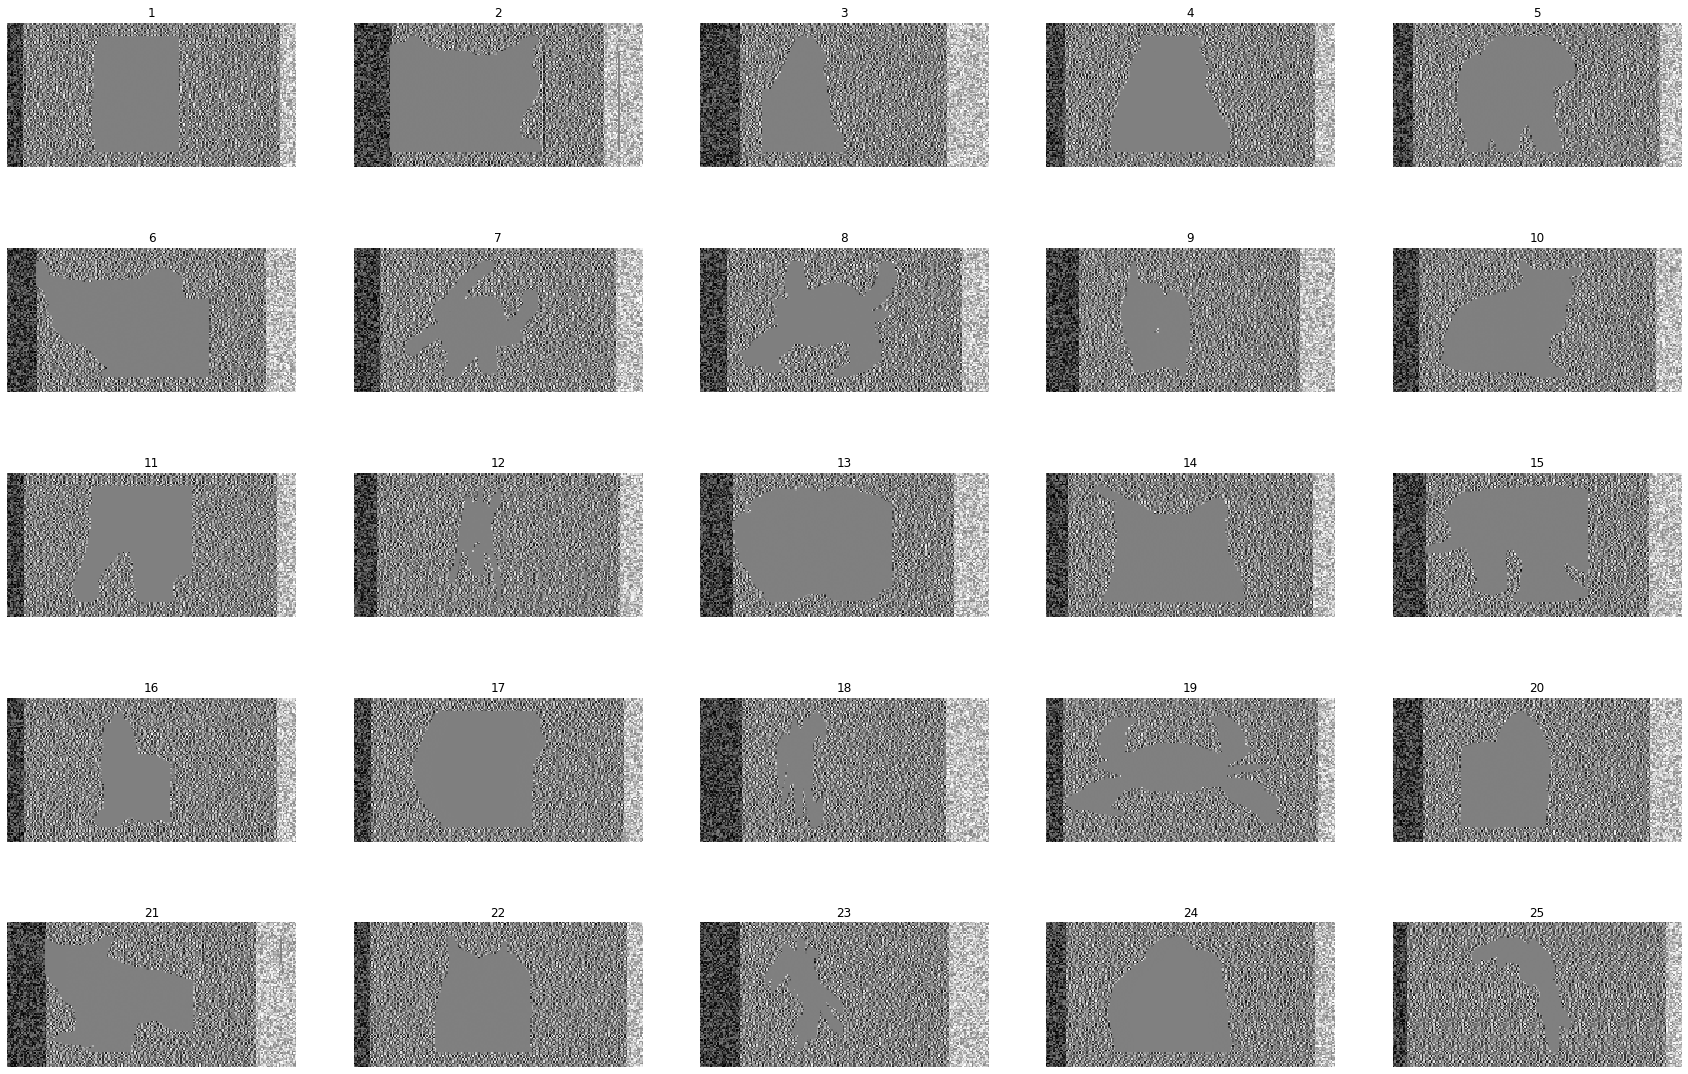

In [7]:
forced_revealing_model = create_revealing_model(model, compiled=False)
forced_revealing_model.summary()

gen = CommonImagesGenerator('../data/fake_heatmaps/', batch_size=25)

batch = gen.__getitem__(0)
figures = forced_revealing_model.predict(batch)
show_images(figures)